# **Problem Statement**
Businesses like airlines have a very low profit margin. Help them increase profit by designing an optimal overboking strategy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
id = "1PazlhissU63pozkOjJckyjIJuM_u-0JF"
print("https://drive.google.com/uc?export=download&id=" + id)

https://drive.google.com/uc?export=download&id=1PazlhissU63pozkOjJckyjIJuM_u-0JF


In [8]:
!wget "https://drive.google.com/uc?export=download&id=1PazlhissU63pozkOjJckyjIJuM_u-0JF" -O airline.csv

--2022-05-06 11:19:19--  https://drive.google.com/uc?export=download&id=1PazlhissU63pozkOjJckyjIJuM_u-0JF
Resolving drive.google.com (drive.google.com)... 142.250.196.14, 2404:6800:4007:805::200e
Connecting to drive.google.com (drive.google.com)|142.250.196.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dk7j7j7tnc4j9u0epv5oa2geh9n5bo3k/1651816125000/06496627672658439642/*/1PazlhissU63pozkOjJckyjIJuM_u-0JF?e=download [following]
--2022-05-06 11:19:20--  https://doc-14-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dk7j7j7tnc4j9u0epv5oa2geh9n5bo3k/1651816125000/06496627672658439642/*/1PazlhissU63pozkOjJckyjIJuM_u-0JF?e=download
Resolving doc-14-14-docs.googleusercontent.com (doc-14-14-docs.googleusercontent.com)... 142.250.76.33, 2404:6800:4007:814::2001
Connecting to doc-14-14-docs.googleusercontent.com (doc-14-14-docs.googleuse

In [9]:
flights = pd.read_csv('airline.csv')
flights.head()

,Passenger_ID,Flight_ID,Arrived
0,1811,A320,1
1,1812,A320,1
2,1813,B777,1
3,1814,B737,1
4,1815,B737,1


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Passenger_ID  1000 non-null   int64 
 1   Flight_ID     1000 non-null   object
 2   Arrived       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


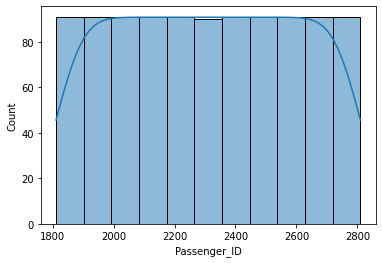

In [11]:
sns.histplot(flights["Passenger_ID"], kde=True)
plt.show()

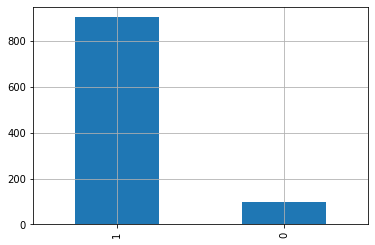

In [12]:
flights["Arrived"].value_counts().plot.bar()
plt.grid()
plt.show()

In [13]:
showsup_probability = flights['Arrived'].value_counts(normalize=True)[1]
print(showsup_probability)

0.902


In [14]:
flights['Arrived'].value_counts()

1    902
0     98
Name: Arrived, dtype: int64

In [59]:
import math

PENALTY = 10000

def comb(n, r):
    num1 = math.factorial(n)
    num2 = math.factorial(r)
    num3 = math.factorial(n-r)
    return num1/(num2*num3)

In [60]:
def calculate_expected_penalty(ticket_sold):
    total_penalty = 0
    for i in range(1, ticket_sold - 100+1):
        ##pmf for k successes, n trials, p=success probab
        prob = stats.binom.pmf(k=100+i,n=ticket_sold,p=showsup_probability)
        penalty = prob*PENALTY*i
        total_penalty += penalty
    return total_penalty

In [61]:
x = []
y = []
for i in range(100, 150):
    sales = 5000*i
    penalty = calculate_expected_penalty(i)
    netsales = sales - penalty
    x.append(i)
    y.append(netsales)
    print("Total seats:",i, ", Net Sales :",round(netsales))
x[y.index(max(y))]

Total seats: 100 , Net Sales : 500000
Total seats: 101 , Net Sales : 505000
Total seats: 102 , Net Sales : 509996
Total seats: 103 , Net Sales : 514979
Total seats: 104 , Net Sales : 519913
Total seats: 105 , Net Sales : 524725
Total seats: 106 , Net Sales : 529288
Total seats: 107 , Net Sales : 533425
Total seats: 108 , Net Sales : 536929
Total seats: 109 , Net Sales : 539603
Total seats: 110 , Net Sales : 541302
Total seats: 111 , Net Sales : 541959
Total seats: 112 , Net Sales : 541595
Total seats: 113 , Net Sales : 540305
Total seats: 114 , Net Sales : 538233
Total seats: 115 , Net Sales : 535544
Total seats: 116 , Net Sales : 532393
Total seats: 117 , Net Sales : 528919
Total seats: 118 , Net Sales : 525227
Total seats: 119 , Net Sales : 521398
Total seats: 120 , Net Sales : 517484
Total seats: 121 , Net Sales : 513521
Total seats: 122 , Net Sales : 509531
Total seats: 123 , Net Sales : 505526
Total seats: 124 , Net Sales : 501514
Total seats: 125 , Net Sales : 497497
Total seats:

111

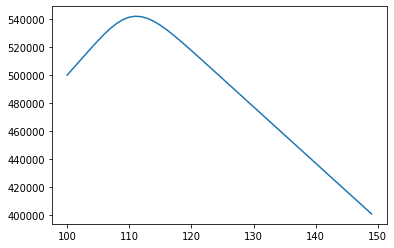

In [62]:
plt.plot(x, y)
plt.show()